In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('/Users/microwave/AIO_2024/Module_3/Project/Heart_disease_prediction')

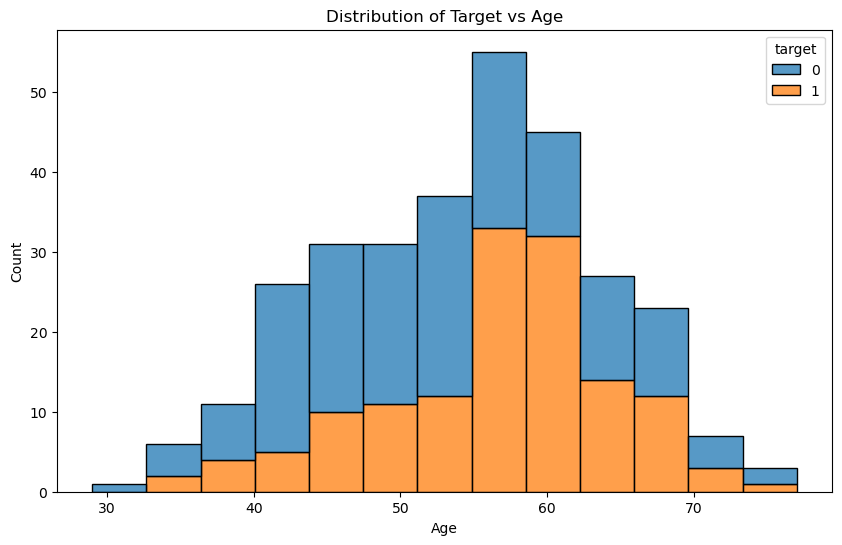

In [3]:
# Loading the dataset you provided earlier
df = pd.read_csv('Cleveland data.csv', header=None)

# Assigning column names based on the screenshot
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# Remap the target variable: 0 -> 0, 1 -> 1, 2 -> 1, 3 -> 1, 4 -> 1 (0 for no disease, 1 for disease)
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Handle missing values in 'thal' and 'ca' columns by replacing NaN with the mean
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# Distribution of target vs age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', multiple='stack', kde=False)
plt.title('Distribution of Target vs Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the plot
plt.show()


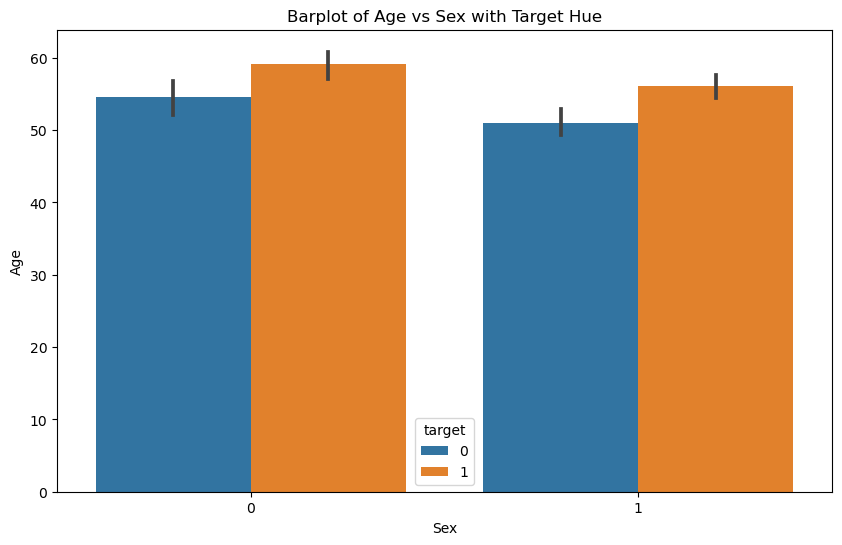

In [4]:
# Creating a barplot of age vs sex with hue set to target
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='sex', y='age', hue='target')

# Adding labels and title
plt.title('Barplot of Age vs Sex with Target Hue')
plt.xlabel('Sex')
plt.ylabel('Age')

# Show the plot
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(
    n_neighbors=5, 
    weights='uniform', 
    algorithm='auto', 
    leaf_size=30, 
    p=2, 
    metric='minkowski'
)

knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for KNN = {accuracy_for_train}')
print(f'Accuracy for test set for KNN = {accuracy_for_test}')

Accuracy for training set for Naive Bayes = 0.76
Accuracy for test set for Naive Bayes = 0.69


In [13]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', random_state=42)


svm_classifier.fit(X_train, y_train)

y_train_pred = svm_classifier.predict(X_train)
y_test_pred = svm_classifier.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for SVM = {accuracy_for_train}')
print(f'Accuracy for test set for SVM = {accuracy_for_test}')

Accuracy for training set for Naive Bayes = 0.66
Accuracy for test set for Naive Bayes = 0.67


In [14]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

y_train_pred = nb_classifier.predict(X_train)
y_test_pred = nb_classifier.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for Naive Bayes = {accuracy_for_train}')
print(f'Accuracy for test set for Naive Bayes = {accuracy_for_test}')

Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


In [15]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=10, 
    min_samples_split=2, 
    random_state=42
)
dt_classifier.fit(X_train, y_train)

y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for DecisionTreeClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for DecisionTreeClassifier = {accuracy_for_test}')

Accuracy for training set for Naive Bayes = 1.0
Accuracy for test set for Naive Bayes = 0.75


In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(
    criterion='gini', 
    max_depth=10, 
    min_samples_split=2, 
    n_estimators=10, 
    random_state=42
)

rf_classifier.fit(X_train, y_train)

y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for RandomForestClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for RandomForestClassifier = {accuracy_for_test}')

Accuracy for training set for Naive Bayes = 0.98
Accuracy for test set for Naive Bayes = 0.8


In [17]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier(
    n_estimators=50, 
    learning_rate=1.0, 
    random_state=42
)

ada_classifier.fit(X_train, y_train)

y_train_pred = ada_classifier.predict(X_train)
y_test_pred = ada_classifier.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for AdaBoost = {accuracy_for_train}')
print(f'Accuracy for test set for AdaBoost = {accuracy_for_test}')

/Users/microwave/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for training set for Naive Bayes = 0.91
Accuracy for test set for Naive Bayes = 0.84


In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(
    learning_rate=0.1, 
    n_estimators=100, 
    subsample=1.0, 
    min_samples_split=2, 
    max_depth=3, 
    random_state=42
)

gb_classifier.fit(X_train, y_train)

y_train_pred = gb_classifier.predict(X_train)
y_test_pred = gb_classifier.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for GradientBoosting = {accuracy_for_train}')
print(f'Accuracy for test set for GradientBoosting = {accuracy_for_test}')

Accuracy for training set for Naive Bayes = 1.0
Accuracy for test set for Naive Bayes = 0.85


In [24]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(
    objective='binary:logistic', 
    random_state=42, 
    n_estimators=100
)

# Train the XGBoost classifier
xgb_classifier.fit(X_train, y_train)

y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for XGBClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for XGBClassifier = {accuracy_for_test}')

Accuracy for training set for XGBClassifier = 1.0
Accuracy for test set for XGBClassifier = 0.87


In [25]:
from sklearn.ensemble import StackingClassifier 

dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier()
gc = GradientBoostingClassifier(random_state=42)
ad = AdaBoostClassifier(random_state=42)
svc = SVC(kernel='rbf',random_state=42)

estimators = [
    ('decision_tree', dtc),
    ('random_forest', rfc),
    ('knn', knn),
    ('xgboost', xgb),
    ('svc', svc)
]

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=GradientBoostingClassifier(random_state=42), cv=5
)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

y_train_pred = stacking_classifier.predict(X_train)
y_test_pred = stacking_classifier.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for StackingClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for StackingClassifier = {accuracy_for_test}')

Accuracy for training set for StackingClassifier = 0.98
Accuracy for test set for StackingClassifier = 0.82
